<a href="https://colab.research.google.com/github/khodaeian/Remote-Bluetooth-Android/blob/master/ANFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import gym

# تعریف شبکه عصبی سیاست
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return torch.softmax(x, dim=-1)

# تعریف شبکه عصبی ارزش
class ValueNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ValueNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# تعریف الگوریتم A3C
class A3C:
    def __init__(self, env, input_size, hidden_size, output_size, lr_policy, lr_value, gamma):
        self.env = env
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr_policy = lr_policy
        self.lr_value = lr_value
        self.gamma = gamma

        self.policy_network = PolicyNetwork(input_size, hidden_size, output_size)
        self.value_network = ValueNetwork(input_size, hidden_size)
        self.optimizer_policy = optim.Adam(self.policy_network.parameters(), lr=lr_policy)
        self.optimizer_value = optim.Adam(self.value_network.parameters(), lr=lr_value)

    def select_action(self, state):
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        action_probs = self.policy_network(state)
        dist = Categorical(action_probs)
        action = dist.sample()
        return action.item(), dist.log_prob(action)

    def update(self, episode_rewards, episode_log_probs):
        returns = []
        discounted_reward = 0
        for reward in reversed(episode_rewards):
            discounted_reward = reward + self.gamma * discounted_reward
            returns.insert(0, discounted_reward)

        #returns = torch.tensor(returns, dtype=torch.float32)
        returns = torch.tensor(returns, dtype=torch.float32)

        log_probs = torch.stack(episode_log_probs)

        #value_predictions = self.value_network(state)
        value_predictions = self.value_network(torch.tensor(state, dtype=torch.float32))
        advantages = returns - value_predictions

        policy_loss = -(log_probs * advantages.detach()).mean()
        value_loss = advantages.pow(2).mean()

        self.optimizer_policy.zero_grad()
        self.optimizer_value.zero_grad()
        policy_loss.backward()
        value_loss.backward()
        self.optimizer_policy.step()
        self.optimizer_value.step()

# پارامترها
env = gym.make('CartPole-v0')
input_size = env.observation_space.shape[0]
hidden_size = 64
output_size = env.action_space.n
lr_policy = 0.0001
lr_value = 0.001
gamma = 0.99

# ساخت مدل و آموزش
agent = A3C(env, input_size, hidden_size, output_size, lr_policy, lr_value, gamma)
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_rewards = []
    episode_log_probs = []
    while not done:
        action, log_prob = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)
        episode_log_probs.append(log_prob)
        state = next_state

    agent.update(episode_rewards, episode_log_probs)
    print('episode_rewards: {} AND episode_log_probs: {}', episode_rewards, episode_log_probs )

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode_rewards: {} AND episode_log_probs: {} [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [tensor([-0.6821], grad_fn=<SqueezeBackward1>), tensor([-0.6831], grad_fn=<SqueezeBackward1>), tensor([-0.6731], grad_fn=<SqueezeBackward1>), tensor([-0.6481], grad_fn=<SqueezeBackward1>), tensor([-0.7688], grad_fn=<SqueezeBackward1>), tensor([-0.7401], grad_fn=<SqueezeBackward1>), tensor([-0.7148], grad_fn=<SqueezeBackward1>), tensor([-0.6841], grad_fn=<SqueezeBackward1>), tensor([-0.6717], grad_fn=<SqueezeBackward1>), tensor([-0.7423], grad_fn=<SqueezeBackward1>), tensor([-0.7162], grad_fn=<SqueezeBackward1>), tensor([-0.6841], grad_fn=<SqueezeBackward1>), tensor([-0.7182], grad_fn=<SqueezeBackward1>)]
episode_rewards: {} AND episode_log_probs: {} [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [tensor([-0.7040], grad_fn=<SqueezeBackward1>), tensor([-0.7199], grad_fn=<SqueezeBackward1>), tensor([-0.7348], grad_fn=<SqueezeBackward1>), tensor([-0.6206], grad_fn=<

In [1]:
!pip install openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Using ANFIS for Breast Cancer**

In [97]:
import logging
logging.getLogger('tensorflow').disabled = False
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # remove WARNING Messages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# parameter class fis parameters


class fis_parameters():
    def __init__(self, n_input: int = 3, n_memb: int = 3, batch_size: int = 16, n_epochs: int = 25, memb_func: str = 'gaussian', optimizer: str = 'sgd', loss: str = 'mse'):
        self.n_input = n_input  # no. of Regressors
        self.n_memb = n_memb  # no. of fuzzy memberships
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.memb_func = memb_func  # 'gaussian' / 'gbellmf'
        self.optimizer = optimizer   # sgd / adam /
        self.loss = loss  # mse / mae


# Main Class ANFIS
class ANFIS:
    def __init__(self, n_input: int, n_memb: int, batch_size: int = 16, memb_func: str = 'gaussian', name: str = 'MyAnfis'):
        self.n = n_input
        self.m = n_memb
        self.batch_size = batch_size
        self.memb_func = memb_func
        input_ = keras.layers.Input(
            shape=(n_input), name='inputLayer', batch_size=self.batch_size)
        L1 = FuzzyLayer(n_input, n_memb, memb_func, name='fuzzyLayer')(input_)
        L2 = RuleLayer(n_input, n_memb, name='ruleLayer')(L1)
        L3 = NormLayer(name='normLayer')(L2)
        L4 = DefuzzLayer(n_input, n_memb, name='defuzzLayer')(L3, input_)
        L5 = SummationLayer(name='sumLayer')(L4)
        self.model = keras.Model(inputs=[input_], outputs=[L5], name=name)
        self.update_weights()

    def __call__(self, X):
        return self.model.predict(X, batch_size=self.batch_size)

    def update_weights(self):
        # premise parameters (mu&sigma for gaussian // a/b/c for bell-shaped)
        if self.memb_func == 'gaussian':
            self.mus, self.sigmas = self.model.get_layer(
                'fuzzyLayer').get_weights()
        elif self.memb_func == 'gbellmf':
            self.a, self.b, self.c = self.model.get_layer(
                'fuzzyLayer').get_weights()
        # consequence parameters
        self.bias, self.weights = self.model.get_layer(
            'defuzzLayer').get_weights()

    def plotmfs(self, show_initial_weights=False):
        n_input = self.n
        n_memb = self.m

        if self.memb_func == 'gaussian':
            mus, sigmas = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            mus, sigmas = mus.reshape(
                (n_memb, n_input, 1)), sigmas.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(mus) - 2 * np.max(abs(sigmas)),
                             np.max(mus) + 2 * np.max(abs(sigmas)), 100).reshape((1, 1, -1))
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = np.exp(-np.square((xn - mus)) / np.square(sigmas))

            if show_initial_weights:
                mus_init, sigmas_init = np.around(self.init_weights, 2)
                mus_init, sigmas_init = mus_init.reshape(
                    n_memb, n_input, 1), sigmas_init.reshape(n_memb, n_input, 1)
                init_curves = np.exp(-np.square((xn - mus_init)
                                                ) / np.square(sigmas_init))

        elif self.memb_func == 'gbellmf':
            a, b, c = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            a, b, c = a.reshape((n_memb, n_input, 1)), b.reshape(
                n_memb, n_input, 1), c.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(c) - 2 * np.max(abs(a)),
                             np.max(c) + 2 * np.max(abs(a)), 100).reshape((1, 1, -1))
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = 1 / (1 + np.square((xn - c) / a)**b)

            if show_initial_weights:
                a_init, b_init, c_init = np.around(self.init_weights, 2)
                a_init, b_init, c_init = a_init.reshape((n_memb, n_input, 1)), b_init.reshape(
                    n_memb, n_input, 1), c_init.reshape(n_memb, n_input, 1)
                init_curves = 1 / \
                    (1 + np.square((xn - c_init) / a_init)**b_init)

        elif self.memb_func == 'sigmoid':
            gammas, c = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            gammas, c = gammas.reshape(
                (n_memb, n_input, 1)), c.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(c) - 2 * np.max(abs(c)), np.max(c) + 2 * np.max(
                abs(c)), 100).reshape((1, 1, -1))  # TODO: change confidence bands
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = 1 / (1 + np.exp(-gammas * (xn - c)))

            if show_initial_weights:
                gammas_init, c_init = np.around(self.init_weights, 2)
                gammas_init, c_init = gammas_init.reshape(
                    n_memb, n_input, 1), c_init.reshape(n_memb, n_input, 1)
                init_curves = 1 / (1 + np.exp(-gammas_init * (xn - c_init)))

        fig, axs = plt.subplots(nrows=n_input, ncols=1, figsize=(8, self.n * 3))
        fig.suptitle('Membership functions', size=16)
        for n in range(self.n):
            axs[n].grid(True)
            axs[n].set_title(f'Input {n+1}')
            for m in range(self.m):
                axs[n].plot(xn[m, n, :], memb_curves[m, n, :])

        if show_initial_weights:  # plot initial membership curve
            for n in range(self.n):
                axs[n].set_prop_cycle(None)  # reset color cycle
                for m in range(self.m):
                    axs[n].plot(xn[m, n, :], init_curves[m, n, :],
                                '--', alpha=.5)
        plt.show()

    def fit(self, X, y, **kwargs):
        # save initial weights in the anfis class
        self.init_weights = self.model.get_layer('fuzzyLayer').get_weights()

        # fit model & update weights in the anfis class
        history = self.model.fit(X, y, **kwargs)
        self.update_weights()

        # clear the graphs
        tf.keras.backend.clear_session()

        return history

    def get_memberships(self, Xs):
        intermediate_layer_model = keras.Model(inputs=self.model.input,
                                               outputs=self.model.get_layer('normLayer').output)

        intermediate_L2_output = intermediate_layer_model.predict(Xs)

        return intermediate_L2_output


# Custom weight initializer
def equally_spaced_initializer(shape, minval=-1.5, maxval=1.5, dtype=tf.float32):
    """
    Custom weight initializer:
        euqlly spaced weights along an operating range of [minval, maxval].
    """
    linspace = tf.reshape(tf.linspace(minval, maxval, shape[0]),
                          (-1, 1))
    return tf.Variable(tf.tile(linspace, (1, shape[1])))


# Layer 1
class FuzzyLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, memb_func='gaussian', **kwargs):
        super(FuzzyLayer, self).__init__(**kwargs)
        self.n = n_input
        self.m = n_memb
        self.memb_func = memb_func

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]

        if self.memb_func == 'gbellmf':
            self.a = self.add_weight(name='a',
                                     shape=(self.m, self.n),
                                     initializer=keras.initializers.RandomUniform(
                                         minval=.7, maxval=1.3, seed=1),
                                     #initializer = 'ones',
                                     trainable=True)
            self.b = self.add_weight(name='b',
                                     shape=(self.m, self.n),
                                     initializer=keras.initializers.RandomUniform(
                                         minval=.7, maxval=1.3, seed=1),
                                     #initializer = 'ones',
                                     trainable=True)
            self.c = self.add_weight(name='c',
                                     shape=(self.m, self.n),
                                     initializer=equally_spaced_initializer,
                                     #initializer = keras.initializers.RandomUniform(minval=-1.5, maxval=1.5, seed=1),
                                     #initializer = 'zeros',
                                     trainable=True)

        elif self.memb_func == 'gaussian':
            self.mu = self.add_weight(name='mu',
                                      shape=(self.m, self.n),
                                      initializer=equally_spaced_initializer,
                                      #initializer = keras.initializers.RandomUniform(minval=-1.5, maxval=1.5, seed=1),
                                      #initializer = 'zeros',
                                      trainable=True)
            self.sigma = self.add_weight(name='sigma',
                                         shape=(self.m, self.n),
                                         initializer=keras.initializers.RandomUniform(
                                             minval=.7, maxval=1.3, seed=1),
                                         #initializer = 'ones',
                                         trainable=True)

        elif self.memb_func == 'sigmoid':
            self.gamma = self.add_weight(name='gamma',
                                         shape=(self.m, self.n),
                                         initializer=equally_spaced_initializer,  # 'ones',
                                         trainable=True)

            self.c = self.add_weight(name='c',
                                     shape=(self.m, self.n),
                                     initializer=equally_spaced_initializer,  # 'ones',
                                     trainable=True)

        # Be sure to call this at the end
        super(FuzzyLayer, self).build(batch_input_shape)

    def call(self, x_inputs):
        if self.memb_func == 'gbellmf':
            L1_output = 1 / (1 +
                             tf.math.pow(
                                 tf.square(tf.subtract(
                                     tf.reshape(
                                         tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.c
                                 ) / self.a), self.b)
                             )
        elif self.memb_func == 'gaussian':
            L1_output = tf.exp(-1 *
                               tf.square(tf.subtract(
                                   tf.reshape(
                                       tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.mu
                               )) / tf.square(self.sigma))

        elif self.memb_func == 'sigmoid':
            L1_output = tf.math.divide(1,
                                       tf.math.exp(-self.gamma *
                                                   tf.subtract(
                                                       tf.reshape(
                                                           tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.c)
                                                   )
                                       )
        return L1_output


# Layer 2
class RuleLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, **kwargs):
        super(RuleLayer, self).__init__(**kwargs)
        self.n = n_input
        self.m = n_memb
        self.batch_size = None

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]
        # self.batch_size = tf.shape(batch_input_shape)[0]
        # Be sure to call this at the end
        super(RuleLayer, self).build(batch_input_shape)

    def call(self, input_):
        if self.n == 2:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1])
        elif self.n == 3:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1])
        elif self.n == 4:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1])
        elif self.n == 5:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 4], [self.batch_size, 1, 1, 1, 1, -1])
        elif self.n == 6:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 4], [self.batch_size, 1, 1, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 5], [
                           self.batch_size, 1, 1, 1, 1, 1, -1])
        else:
            raise ValueError(
                f'This ANFIS implementation works with 2 to 6 inputs.')

        return tf.reshape(L2_output, [self.batch_size, -1])


# Layer 3
class NormLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, w):
        w_sum = tf.reshape(tf.reduce_sum(w, axis=1), (-1, 1))
        w_norm = w / w_sum
        return w_norm


# Layer 4
class DefuzzLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, **kwargs):
        super().__init__(**kwargs)
        self.n = n_input
        self.m = n_memb

        self.CP_bias = self.add_weight(name='Consequence_bias',
                                       shape=(1, self.m ** self.n),
                                       initializer=keras.initializers.RandomUniform(
                                           minval=-2, maxval=2),
                                       # initializer = 'ones',
                                       trainable=True)
        self.CP_weight = self.add_weight(name='Consequence_weight',
                                         shape=(self.n, self.m ** self.n),
                                         initializer=keras.initializers.RandomUniform(
                                             minval=-2, maxval=2),
                                         # initializer = 'ones',
                                         trainable=True)

    def call(self, w_norm, input_):

        L4_L2_output = tf.multiply(w_norm,
                                   tf.matmul(input_, self.CP_weight) + self.CP_bias)
        return L4_L2_output  # Defuzzyfied Layer


# Layer 5
class SummationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]
        #self.batch_size = tf.shape(batch_input_shape)[0]
        # Be sure to call this at the end
        super(SummationLayer, self).build(batch_input_shape)

    def call(self, input_):
        L5_L2_output = tf.reduce_sum(input_, axis=1)
        L5_L2_output = tf.reshape(L5_L2_output, (-1, 1))
        return L5_L2_output

    # def compute_L2_output_shape(self, batch_input_shape):
        # return tf.TensorShape([self.batch_size, 1])

In [98]:
import pandas as pd
import numpy as np
import sys
sys.maxsize

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

In [100]:
df = pd.read_csv('/content/sample_data/breast_cancer.csv')
df.shape
df.head(5)

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [101]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [102]:
df.to_numpy()

array([[0.2654 , 0.4601 , 0.1189 , 0.     ],
       [0.186  , 0.275  , 0.08902, 0.     ],
       [0.243  , 0.3613 , 0.08758, 0.     ],
       ...,
       [0.1418 , 0.2218 , 0.0782 , 0.     ],
       [0.265  , 0.4087 , 0.124  , 0.     ],
       [0.     , 0.2871 , 0.07039, 1.     ]])

In [103]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [104]:
df.describe()

,569,30,malignant,benign
count,569.000000,569.000000,569.000000,569.000000
mean,0.114606,0.290076,0.083946,0.627417
std,0.065732,0.061867,0.018061,0.483918
min,0.000000,0.156500,0.055040,0.000000
25%,0.064930,0.250400,0.071460,0.000000
50%,0.099930,0.282200,0.080040,1.000000
75%,0.161400,0.317900,0.092080,1.000000
max,0.291000,0.663800,0.207500,1.000000


In [105]:
scaler=MinMaxScaler()
df2=scaler.fit_transform(df)
df2

array([[0.91202749, 0.59846245, 0.41886396, 0.        ],
       [0.63917526, 0.23358959, 0.22287813, 0.        ],
       [0.83505155, 0.40370589, 0.21343303, 0.        ],
       ...,
       [0.48728522, 0.12872068, 0.1519087 , 0.        ],
       [0.91065292, 0.49714173, 0.45231536, 0.        ],
       [0.        , 0.25744136, 0.10068215, 1.        ]])

In [106]:
print(type(df2))

<class 'numpy.ndarray'>


In [107]:
X=df2[:,0:3]
Y=df2[:,-1]

display(X)
display(Y)

array([[0.91202749, 0.59846245, 0.41886396],
       [0.63917526, 0.23358959, 0.22287813],
       [0.83505155, 0.40370589, 0.21343303],
       ...,
       [0.48728522, 0.12872068, 0.1519087 ],
       [0.91065292, 0.49714173, 0.45231536],
       [0.        , 0.25744136, 0.10068215]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [108]:
print(Y.shape)
print(X.shape)

(569,)
(569, 3)


In [110]:
param = fis_parameters(
            n_input = 3,                # no. of Regressors
            n_memb = 3,                 # no. of fuzzy memberships
            batch_size = 1,            # 16 / 32 / 64 / ...
            memb_func = 'gaussian',      # 'gaussian' / 'gbellmf' / 'sigmoid'
            optimizer = 'adam',          # sgd / adam / ...
            #loss = tf.keras.losses.MeanAbsolutePercentageError(),
            loss = 'huber_loss',               # mse / mae / huber_loss / mean_absolute_percentage_error / ...
            n_epochs = 200               # 10 / 25 / 50 / 100 / ...
            )

In [111]:
# kfold=KFold(n_splits=2)
histories=[]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [112]:
fis = ANFIS(n_input = param.n_input,
                        n_memb = param.n_memb,
                        batch_size = param.batch_size,
                        memb_func = param.memb_func,
                        name = 'myanfis'
                        )

In [113]:
    # compile model
fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss
                      ,metrics=['mae', 'mse']  # ['mae', 'mse']
                      )

In [ ]:
# fit model
history = fis.fit(X_train, y_train,
                      epochs=param.n_epochs,
                      batch_size=param.batch_size,
                      validation_data = (X_test, y_test),
                       #callbacks = [tensorboard_callback]  # for tensorboard
                      )
histories.append(history)

Epoch 1/200
381/381 [==============================] - 3s 4ms/step - loss: 0.2891 - mae: 0.7202 - mse: 0.5793 - val_loss: 0.2060 - val_mae: 0.6312 - val_mse: 0.4137
Epoch 2/200
381/381 [==============================] - 1s 3ms/step - loss: 0.1496 - mae: 0.5370 - mse: 0.2992 - val_loss: 0.1069 - val_mae: 0.4458 - val_mse: 0.2144
Epoch 3/200
381/381 [==============================] - 1s 2ms/step - loss: 0.0684 - mae: 0.3333 - mse: 0.1368 - val_loss: 0.0509 - val_mae: 0.2444 - val_mse: 0.1018
Epoch 4/200
381/381 [==============================] - 1s 3ms/step - loss: 0.0482 - mae: 0.2434 - mse: 0.0965 - val_loss: 0.0508 - val_mae: 0.2548 - val_mse: 0.1016
Epoch 5/200
381/381 [==============================] - 1s 3ms/step - loss: 0.0454 - mae: 0.2355 - mse: 0.0909 - val_loss: 0.0461 - val_mae: 0.2311 - val_mse: 0.0921
Epoch 6/200
381/381 [==============================] - 1s 3ms/step - loss: 0.0437 - mae: 0.2279 - mse: 0.0875 - val_loss: 0.0451 - val_mae: 0.2329 - val_mse: 0.0903
Epoch 7/20

In [80]:
print(history.params)

{'verbose': 1, 'epochs': 200, 'steps': 119}


In [81]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


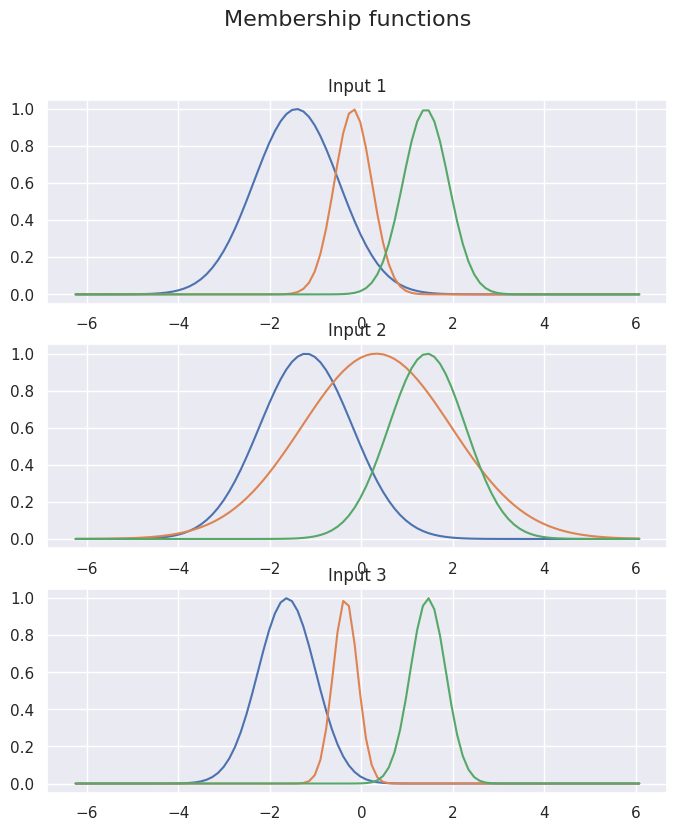

In [82]:
fis.plotmfs()

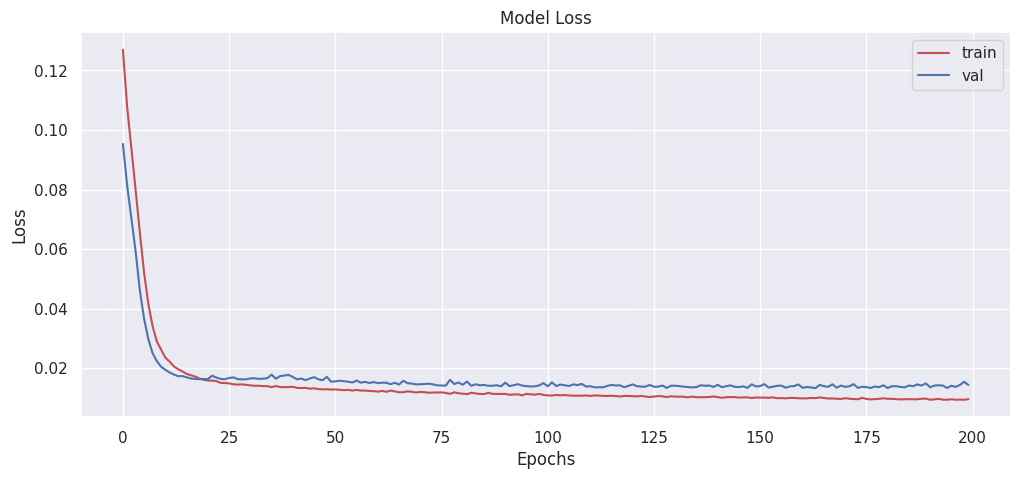

In [83]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

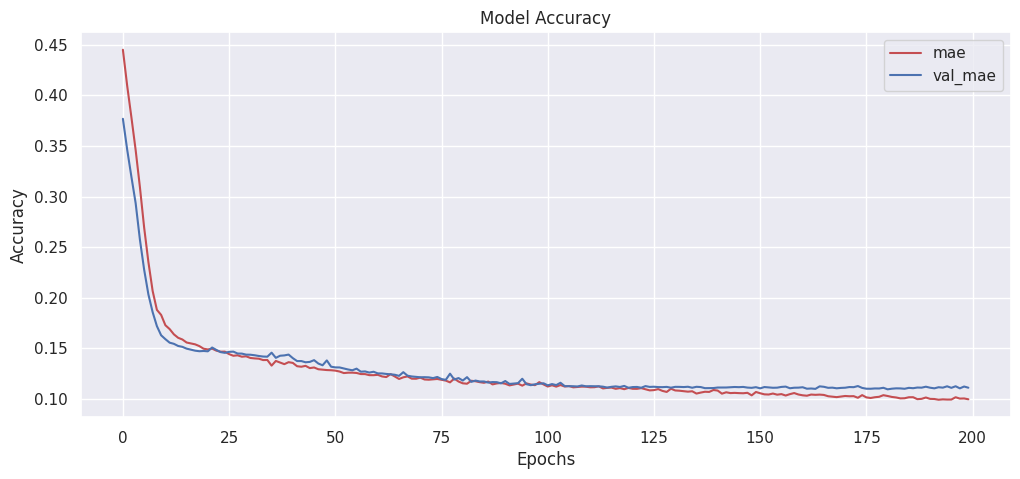

In [84]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], color='r')
plt.plot(history.history['val_mae'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['mae', 'val_mae'])
plt.show()

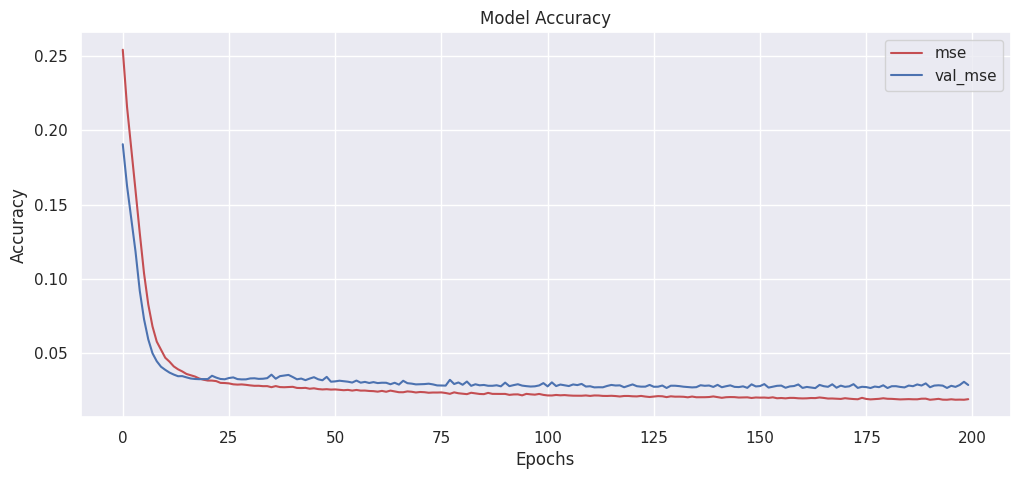

In [85]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['mse'], color='r')
plt.plot(history.history['val_mse'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['mse', 'val_mse'])
plt.show()

In [86]:
a=fis.model.summary()

Model: "myanfis"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputLayer (InputLayer)        [(1, 3)]             0           []                               
                                                                                                  
 fuzzyLayer (FuzzyLayer)        (1, 3, 3)            18          ['inputLayer[0][0]']             
                                                                                                  
 ruleLayer (RuleLayer)          (1, 27)              0           ['fuzzyLayer[0][0]']             
                                                                                                  
 normLayer (NormLayer)          (1, 27)              0           ['ruleLayer[0][0]']              
                                                                                            

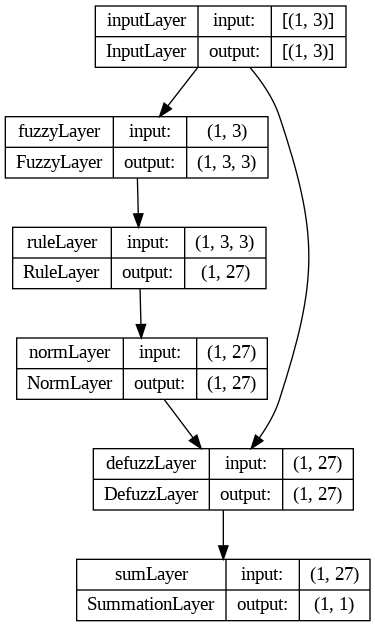

In [87]:
from keras.utils.vis_utils import plot_model


plot_model(fis.model, to_file='multiple_outputs.png',show_shapes=True)

In [88]:
print(X_test.shape)
#y_test=y_test.reshape(42,1)
y_test.shape

#pred= fis.model.predict(X_test)

(59, 3)


(59,)

In [89]:
y_pred = fis(X_test)

59/59 [==============================] - 0s 1ms/step


59/59 [==============================] - 0s 1ms/step


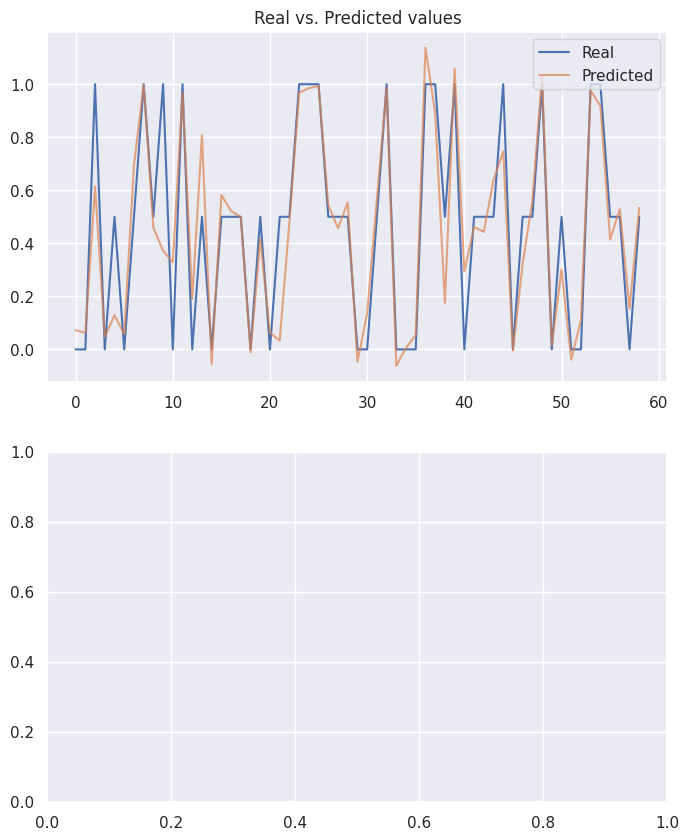

In [90]:
# ## Evaluate Model
# fis.model.evaluate(X_test, y_test)
plot_prediction=True
if plot_prediction:
    y_pred = fis(X_test)
    f, axs = plt.subplots(2, 1, figsize=(8, 10))
    # f.suptitle(f'{gen.get_data_name(data_id)} time series', size=16)
    axs[0].plot(y_test)
    axs[0].plot(y_pred, alpha=.7)
    axs[0].legend(['Real', 'Predicted'])
    axs[0].grid(True)
    axs[0].set_title('Real vs. Predicted values')
    # axs[1].plot(y_test, y_test - y_pred)
    # axs[1].legend(['pred_error'])
    # axs[1].grid(True)
    # axs[1].set_title('Prediction Error')
    plt.show()

In [92]:
y_pred
print(y_pred.shape)
print(y_test.shape)
y_test=y_test.reshape(59,1)
y_test.shape

(59, 1)
(59,)


(59, 1)

In [93]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [94]:
co=np.concatenate((y_test, y_pred),axis=1)
co

array([[ 0.        ,  0.07239198],
       [ 0.        ,  0.06215509],
       [ 1.        ,  0.61475599],
       [ 0.        ,  0.04717815],
       [ 0.5       ,  0.12869862],
       [ 0.        ,  0.05726006],
       [ 0.5       ,  0.69338983],
       [ 1.        ,  0.99904823],
       [ 0.5       ,  0.45864007],
       [ 1.        ,  0.37200528],
       [ 0.        ,  0.32860756],
       [ 1.        ,  0.96724015],
       [ 0.        ,  0.19054449],
       [ 0.5       ,  0.80697858],
       [ 0.        , -0.05697687],
       [ 0.5       ,  0.58190799],
       [ 0.5       ,  0.5218662 ],
       [ 0.5       ,  0.49877441],
       [ 0.        , -0.01139202],
       [ 0.5       ,  0.41675052],
       [ 0.        ,  0.06265524],
       [ 0.5       ,  0.03246855],
       [ 0.5       ,  0.48079568],
       [ 1.        ,  0.96779782],
       [ 1.        ,  0.98517489],
       [ 1.        ,  0.99306709],
       [ 0.5       ,  0.54480624],
       [ 0.5       ,  0.45678663],
       [ 0.5       ,

In [95]:
column_values= ['Real', 'Prediction']
df = pd.DataFrame(data = co,columns = column_values)
df.reset_index(inplace = True)

r2 Score : 0.8036280777017755
MSE Score : 0.028770376435534182
RMSE Score : 0.16961832576562647
MAE Score : 0.1111454533460408


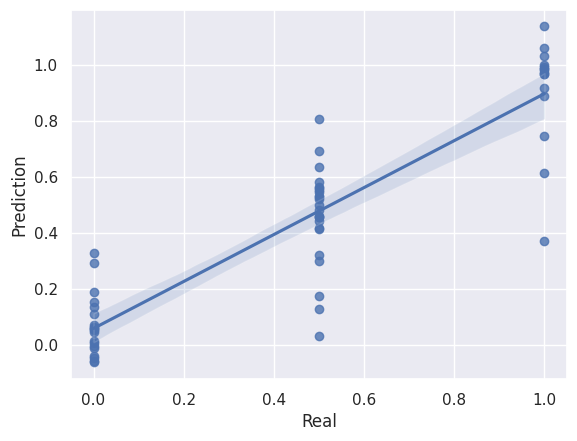

In [96]:
import seaborn as sns

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

print("r2 Score :", r2_score(y_test, y_pred))
print("MSE Score :", mean_squared_error(y_test, y_pred))
print("RMSE Score :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE Score :", mean_absolute_error(y_test, y_pred))
#accuracy = np.mean(y_pred == y_test) * 100
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy : {accuracy}%")

sns.set_theme(color_codes=True)
ax = sns.regplot(x="Real", y="Prediction", data=df)